<a href="https://colab.research.google.com/github/mjgutierre/DataScience/blob/main/lab1_nltk_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad EAFIT Maria jose Gutierrez Estrada 2024-2

Se cargaron las librerias necesarias
1. nltk para 'procesamiento natural del lenguaje'
2. pandas para procesamiento de dataframes, muy usado en preparación de datos
3. re - expresiones regulares
4. numpy, codecs, etc - otras

In [2]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [3]:
!pip3 install nltk
!pip3 install pandas

In [4]:
# directorios (path) de entrada y salida:#
path_in="../datasets/gutenberg-es/"
path_out="../out/"
filenametxt='pg2000.txt'
filenamecleantxt='pg2000_clean.txt'
filenamecsv='pg2000.csv'

In [5]:
# corpus de nltk para 'tokenizer', 'stopwords' y 'words' (diccionarios)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
# ejemplo de como nltk tokeniza:
texto="texto libre que permite crear     hiso20091iras epor--4 no s#e preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

17
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor', '--', '4', 'no', 's', '#', 'e', 'preocupe', 'hola', 'mundo', 'cruel']


In [9]:
texto="texto libre que permite crear     hiso20091iras            epor--4 no s#e preocupe \n hola mundo cruel"
tokens = texto.split()
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor--4', 'no', 's#e', 'preocupe', 'hola', 'mundo', 'cruel']


In [10]:
# stopwords en nltk
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{'didn', "she's", 'had', "hasn't", 'below', 'it', "it's", 'my', 'by', 'should', 'a', 's', 'couldn', 'from', 'hadn', 'what', "should've", 'after', 'above', "doesn't", 'd', 'wouldn', 'for', 'him', 'just', 'ourselves', 'here', 'some', 'were', 'on', 'there', 'more', 'until', 'will', 'other', 'themselves', 'y', 'her', 'she', "you'll", 'very', 'while', 'where', 'we', 'aren', 'before', 'only', 'its', 'with', 'such', 'these', 't', 'haven', 'is', 'up', 're', 'ours', "don't", 'hasn', "mightn't", 'are', 'further', 'won', 'about', 'because', 'you', 'has', 'between', 'yours', 'm', 'itself', "needn't", 'down', 'theirs', 'weren', 'against', 'me', 'this', 'being', "weren't", 'them', 'nor', 'any', "couldn't", 'mustn', 'as', 'ma', 'wasn', 'over', 'their', 'the', 'yourself', 'i', 'during', "haven't", 'll', 'yourselves', 'having', 'off', 'o', 'did', 'once', 'most', 'shouldn', 'of', 'few', 'those', 'when', 'then', 'doing', 'if', 'ain', 'am', 'both', 'how', 'so', 'under', 'shan', 'that', 'have', "you've

In [11]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en

x = len(voc_en.words())
print('tamaño del diccionario en inglés del nltk: ',x)

# verifica si una palabra pertenece al diccionario:
w = "house"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")

w = "pepito"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")

tamaño del diccionario en inglés del nltk:  236736
house  true
pepito  false


In [71]:
# leer un archivo de ejemplo en .txt
input_file = open('st1800-242/datasets/gutenberg-es/57654-0.txt', "r", encoding='iso-8859-1')
filedata = input_file.read()
print(filedata[:500])  # Muestra los primeros 500 caracteres del archivo


ï»¿The Project Gutenberg EBook of La IlÃ­ada, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll
have to check the laws of the country where you are located before using
this ebook.




# **Procesar texto y graficar las 20 palabras más frecuentes**

Diferencias

**Tokenización**

- **Opción 1 (split()):** Tokeniza solo por espacios en blanco. No maneja adecuadamente los signos de puntuación o los casos donde las palabras están unidas por otros caracteres (como guiones o comillas).
Por ejemplo, I’m podría no separarse correctamente y convertirse en I y m.

- **Opción 2 (nltk.word_tokenize()):** Maneja bien la mayoría de los casos que .split() no maneja, como los signos de puntuación, contracciones, y palabras separadas por símbolos.
Ejemplo: I’m se tokenizará correctamente como I y ’m.

numero de palabras finales =  8025
[('oh', 381), ('dijo', 337), ('alnur', 244), ('ms', 231), ('entonces', 223), ('califa', 185), ('the', 179), ('alah', 146), ('visir', 145), ('casa', 142), ('ghanem', 142), ('pues', 137), ('despus', 135), ('dulceamiga', 134), ('qu', 131), ('haba', 128), ('hermano', 122), ('of', 119), ('jeique', 117), ('joven', 104)]


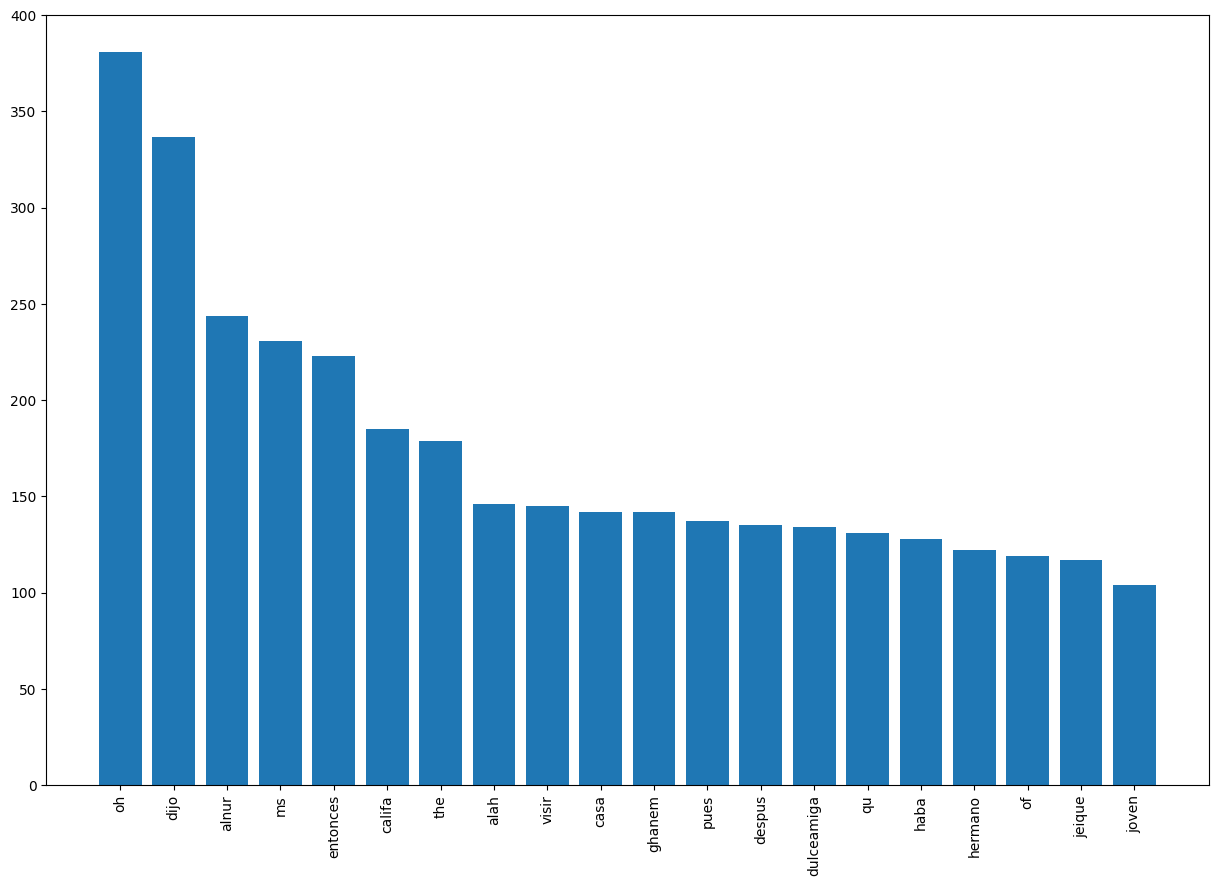

In [27]:
# opción 1:
# TOKENIZAR con .split(),
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  7965
[('', 1817), ('oh', 381), ('dijo', 337), ('alnur', 245), ('ms', 232), ('entonces', 223), ('califa', 185), ('the', 180), ('alah', 146), ('visir', 145), ('casa', 142), ('ghanem', 142), ('pues', 137), ('dulceamiga', 135), ('despus', 135), ('qu', 131), ('haba', 128), ('hermano', 122), ('of', 119), ('jeique', 117)]


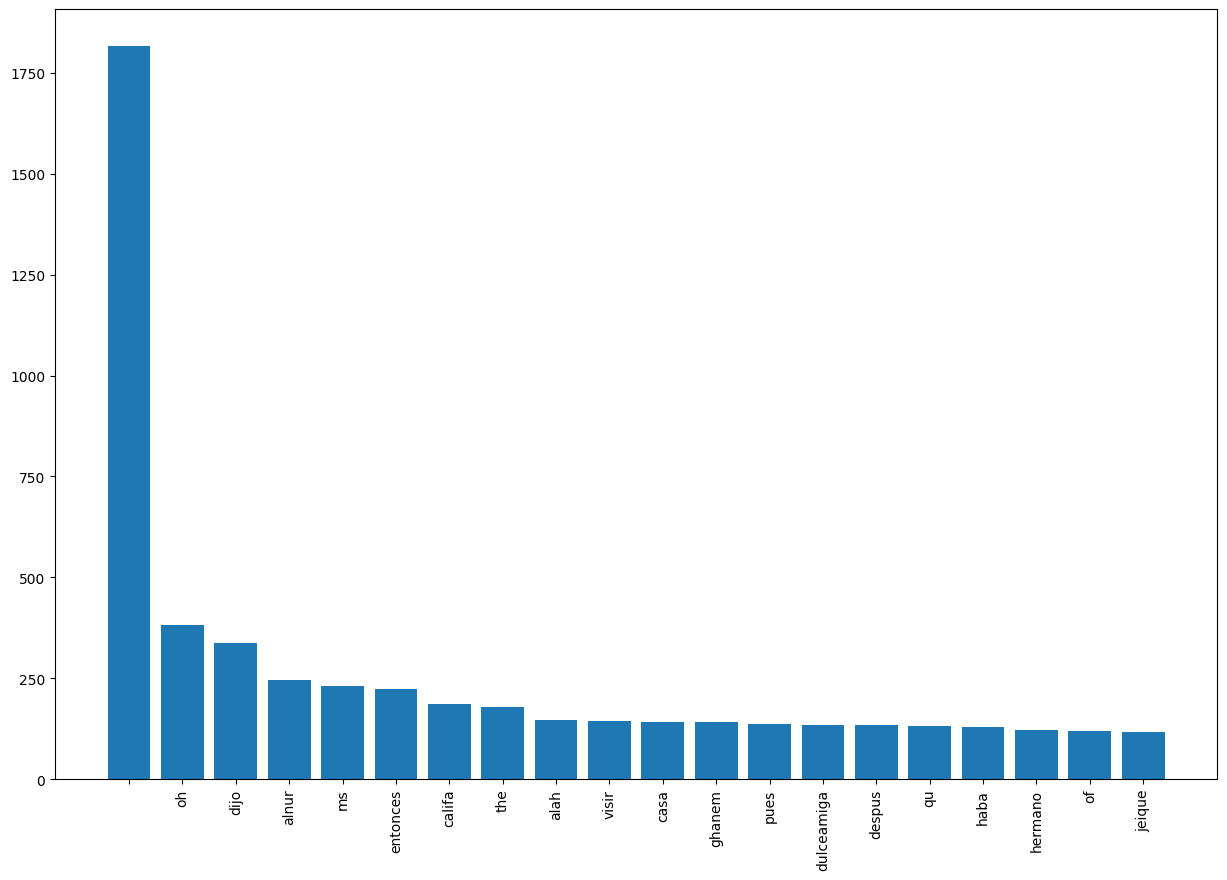

In [28]:
# opción 2:
# TOKENIZAR con nltk,
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

tokens = nltk.word_tokenize(filedata)
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## Stemming y Lemmatization con NLTK
- Con Lancaster

numero de palabras finales =  6494


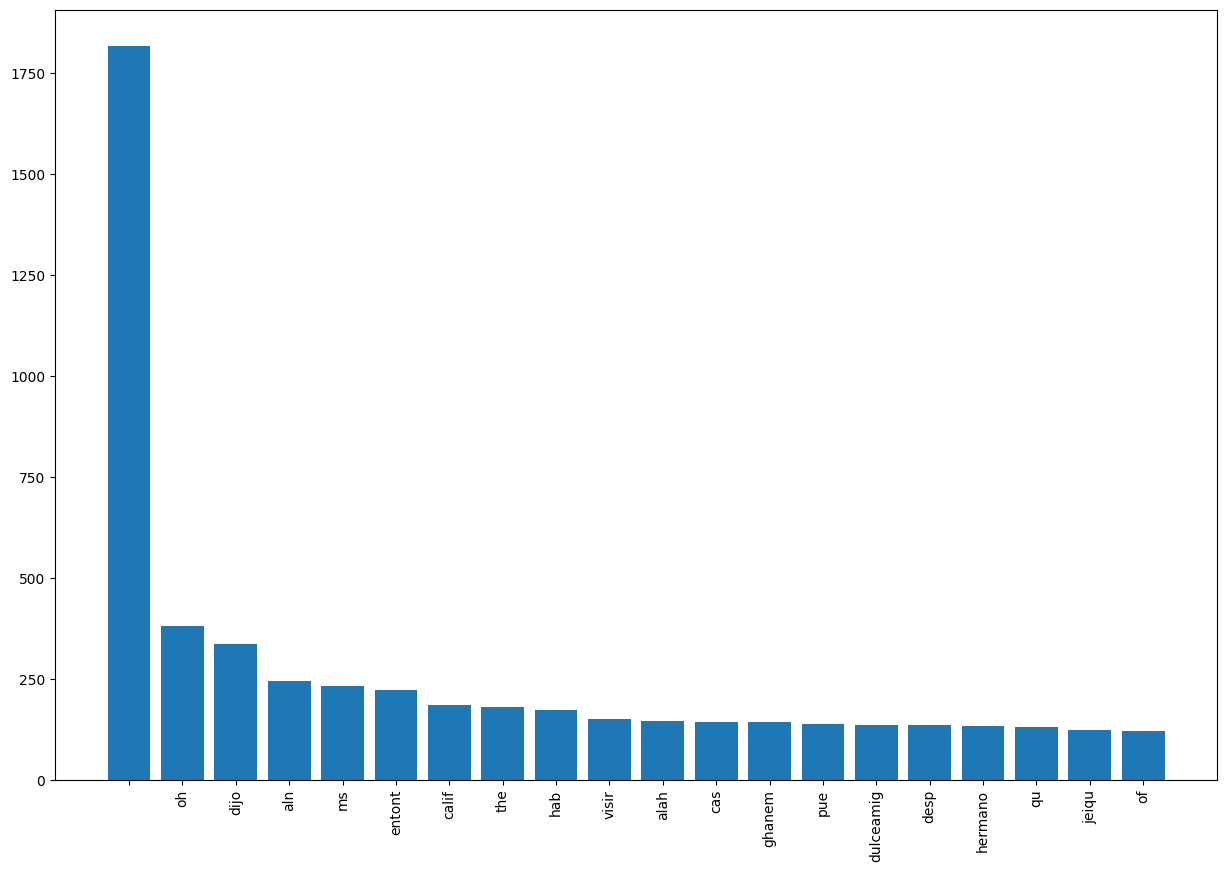

In [29]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
# probar cada una de las siguientes opciones: porter y lancaster.
#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


numero de palabras finales =  6474


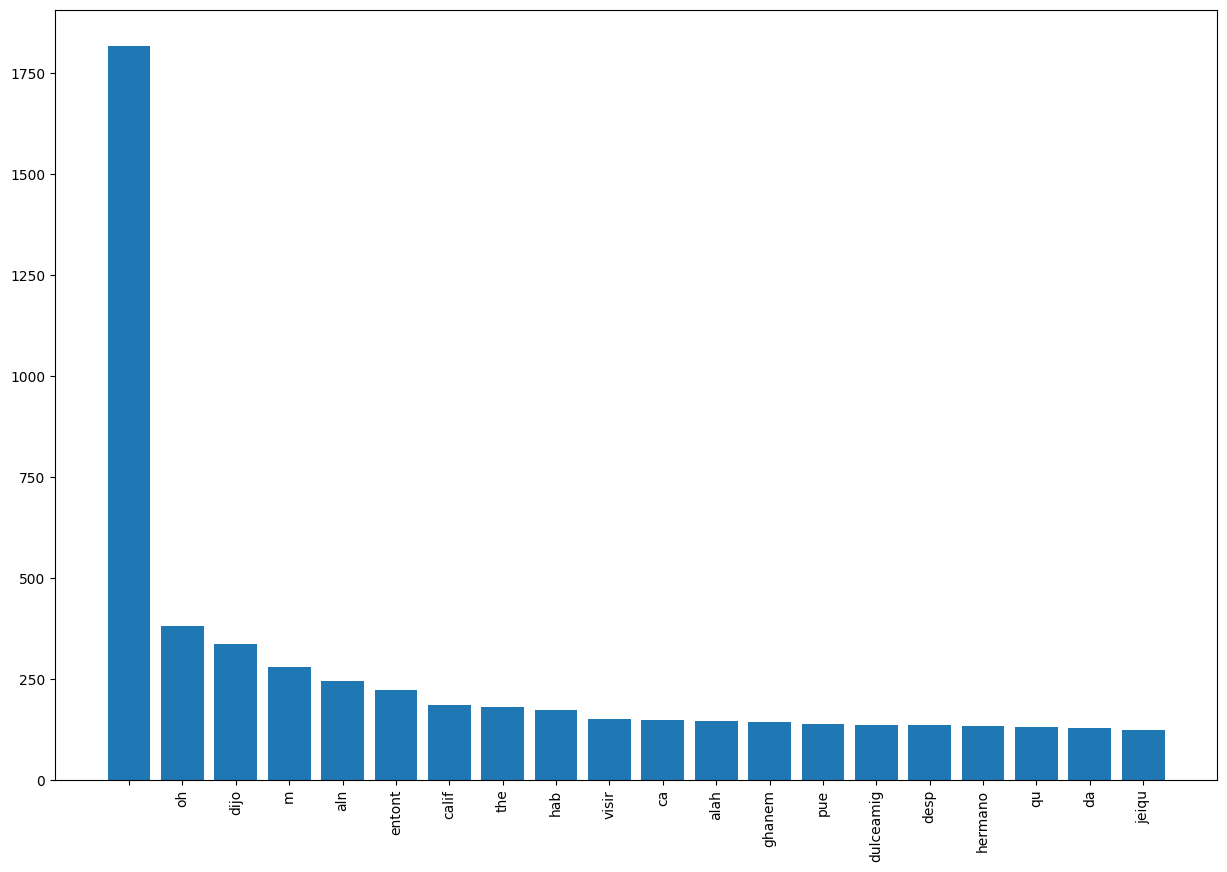

In [30]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones:
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Stemming y Lemmatization con NLTK
- Con Porter

numero de palabras finales =  6394


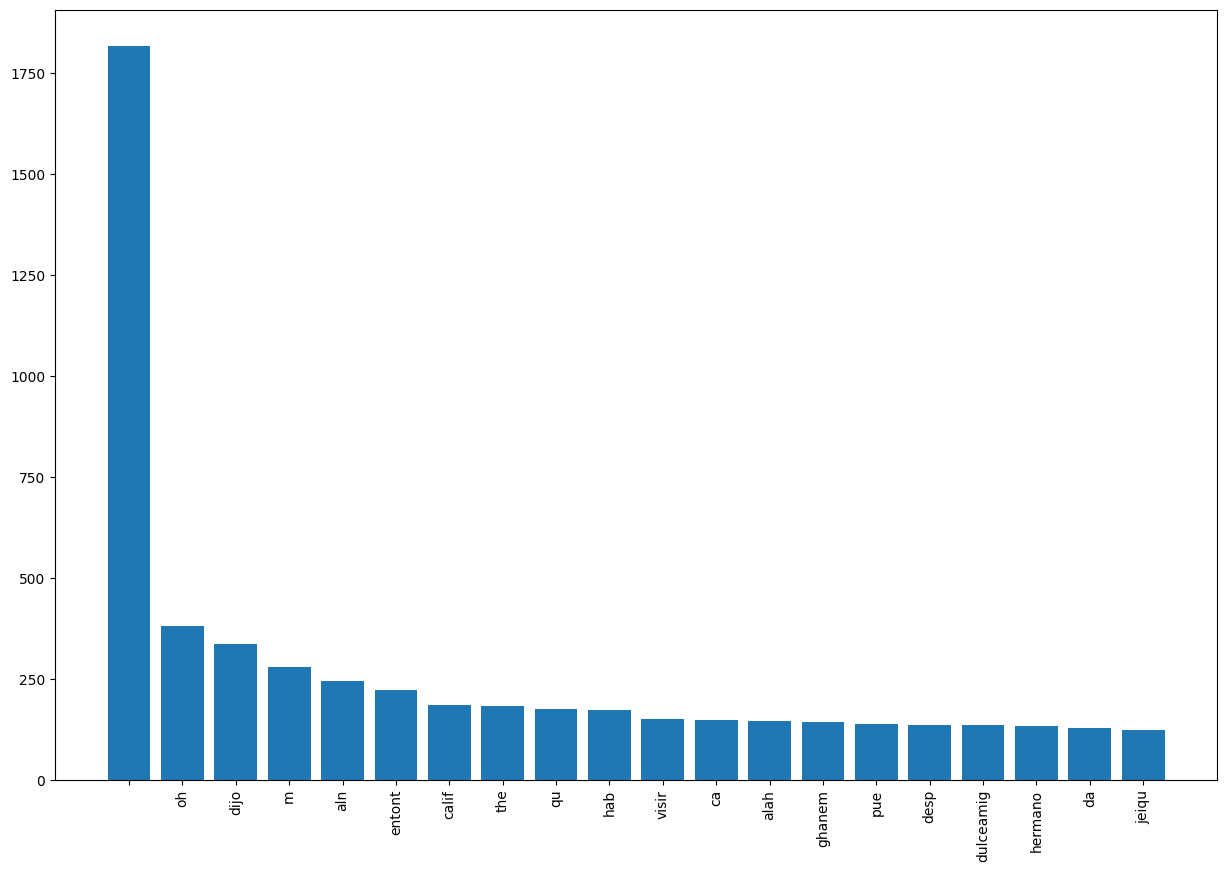

In [31]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

tokens = [porter.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


numero de palabras finales =  6389


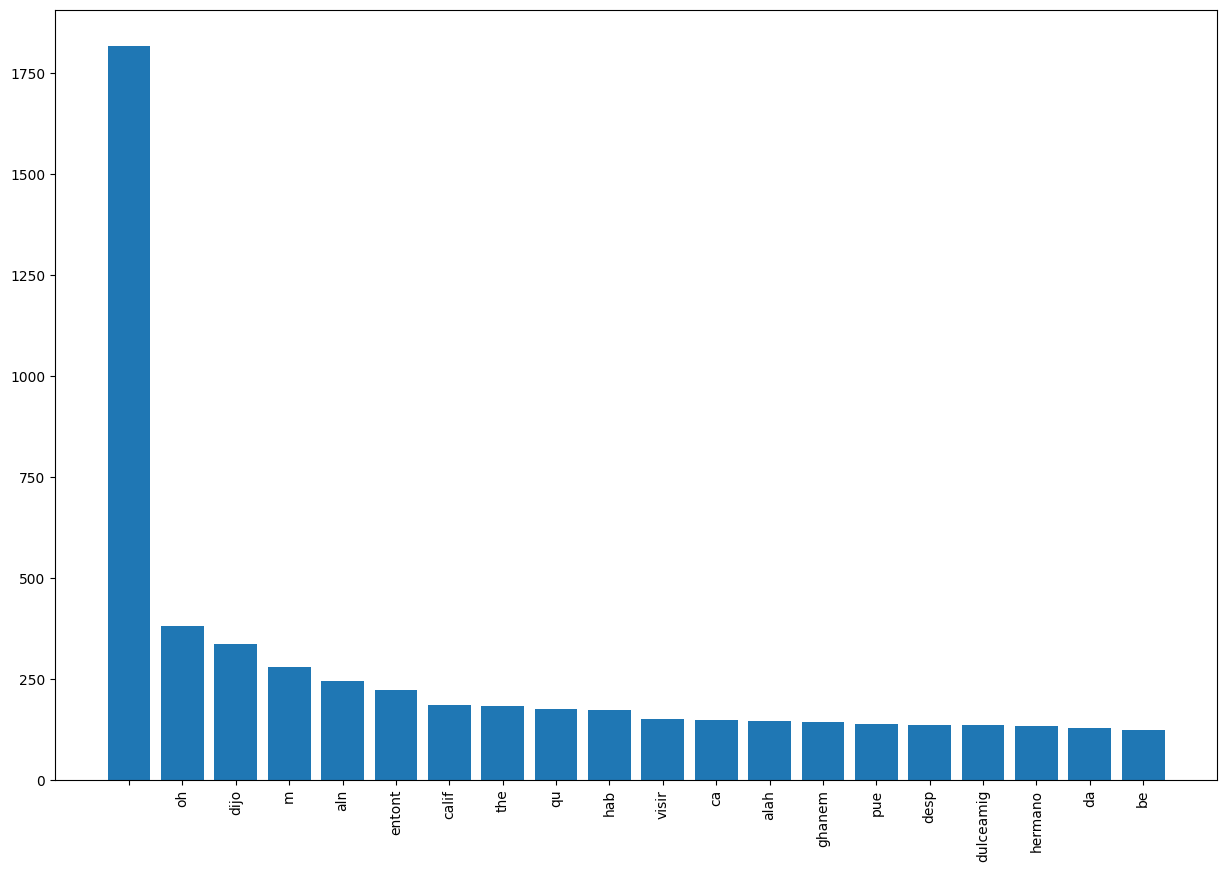

In [32]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [72]:
# volver a leer el archivo ejemplo en .txt
#input_file = open(path_in+filenametxt, "r",encoding='iso-8859-1')
input_file = open('st1800-242/datasets/gutenberg-es/57654-0.txt', "r")
output_file_clean = open('st1800-242/Out/48903_clean.txt', "w")

print("Archivo leído y procesado con éxito.")

Archivo leído y procesado con éxito.


In [73]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

for line in input_file:
    line_clean = ""
    tokens = nltk.word_tokenize(line)
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words_nltk]

    #tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens]

    #tokens = [porter.stem(w) for w in tokens]
    tokens = [lancaster.stem(w) for w in tokens]

    for w in tokens:
        line_clean=line_clean+w+" "

    if (line_clean!=""):
        line_clean=line_clean+"\n"
        output_file_clean.write(line_clean)

output_file_clean.close()

In [86]:
input_file_clean = open('st1800-242/Out/48903_clean.txt', "r", encoding='iso-8859-1')
print(filedata[:200])  # Muestra los primeros 500 caracteres del archivo

tokens = filedata.split()
print(tokens[:20])  # Imprime los primeros 20 tokens para verificar la tokenización

the project gutenberg ebook of ilad by hom 
thi ebook is for the us of anyon anywh in the unit stat and 
most oth part of the world at cost and with almost restrict 
whatsoev you may cop it giv it awa
['the', 'project', 'gutenberg', 'ebook', 'of', 'ilad', 'by', 'hom', 'thi', 'ebook', 'is', 'for', 'the', 'us', 'of', 'anyon', 'anywh', 'in', 'the', 'unit']


numero de palabras finales =  11502


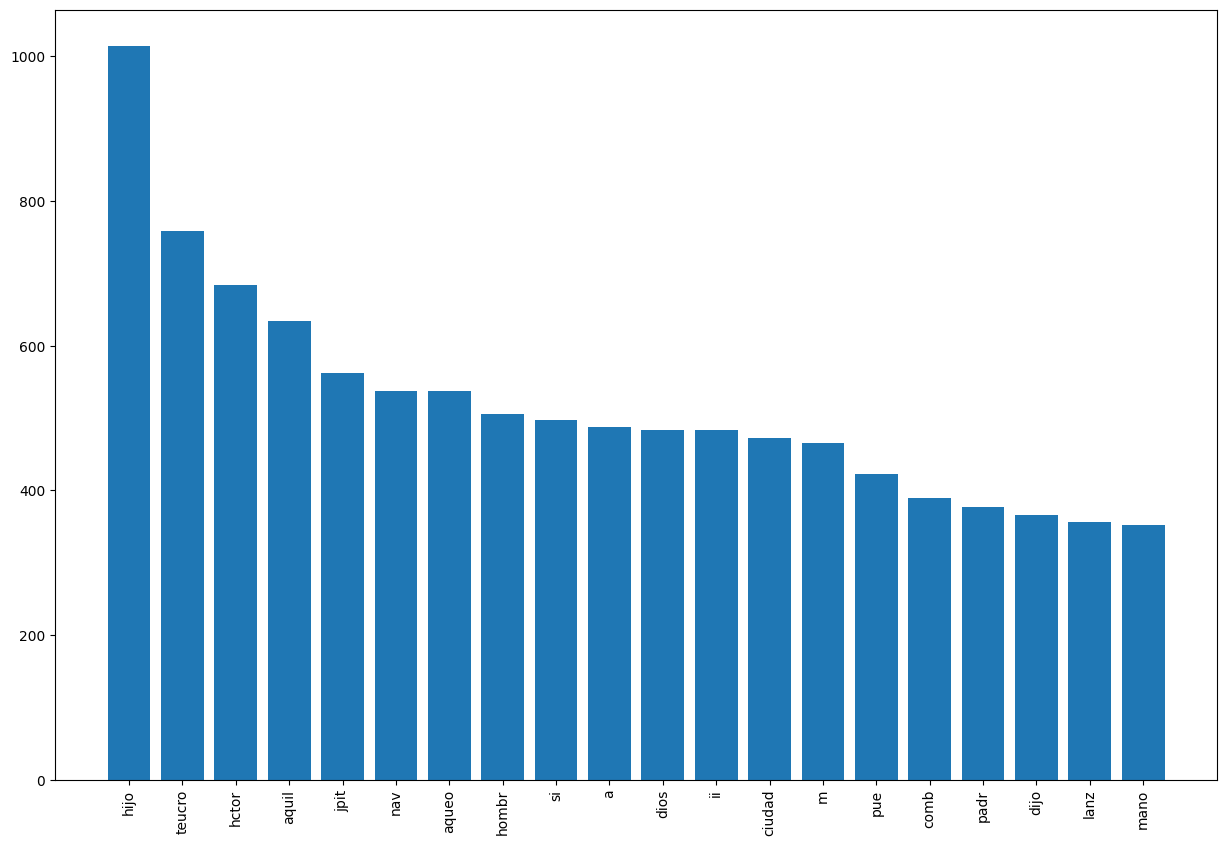

In [75]:
filedata = input_file_clean.read()
tokens = filedata.split()
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [79]:
word_freq = fdist.most_common(len(fdist))

In [81]:
import csv

with open('st1800-242/Out/48903_clean.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["word", "frecuency"])
    writer.writerows(word_freq)

csvFile.close()

In [82]:
# extract top 30 words
top_words = word_freq[:20]
print(top_words)

[('hijo', 1014), ('teucro', 758), ('hctor', 684), ('aquil', 634), ('jpit', 562), ('nav', 538), ('aqueo', 537), ('hombr', 505), ('si', 497), ('a', 487), ('dios', 483), ('ii', 483), ('ciudad', 473), ('m', 466), ('pue', 422), ('comb', 389), ('padr', 377), ('dijo', 366), ('lanz', 356), ('mano', 352)]


In [83]:
import pandas as pd
df = pd.DataFrame(top_words)
df.head()

,0,1
0,hijo,1014
1,teucro,758
2,hctor,684
3,aquil,634
4,jpit,562


from matplotlib import pyplot as plt
_df_0[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3[0].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x=1, y=0, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

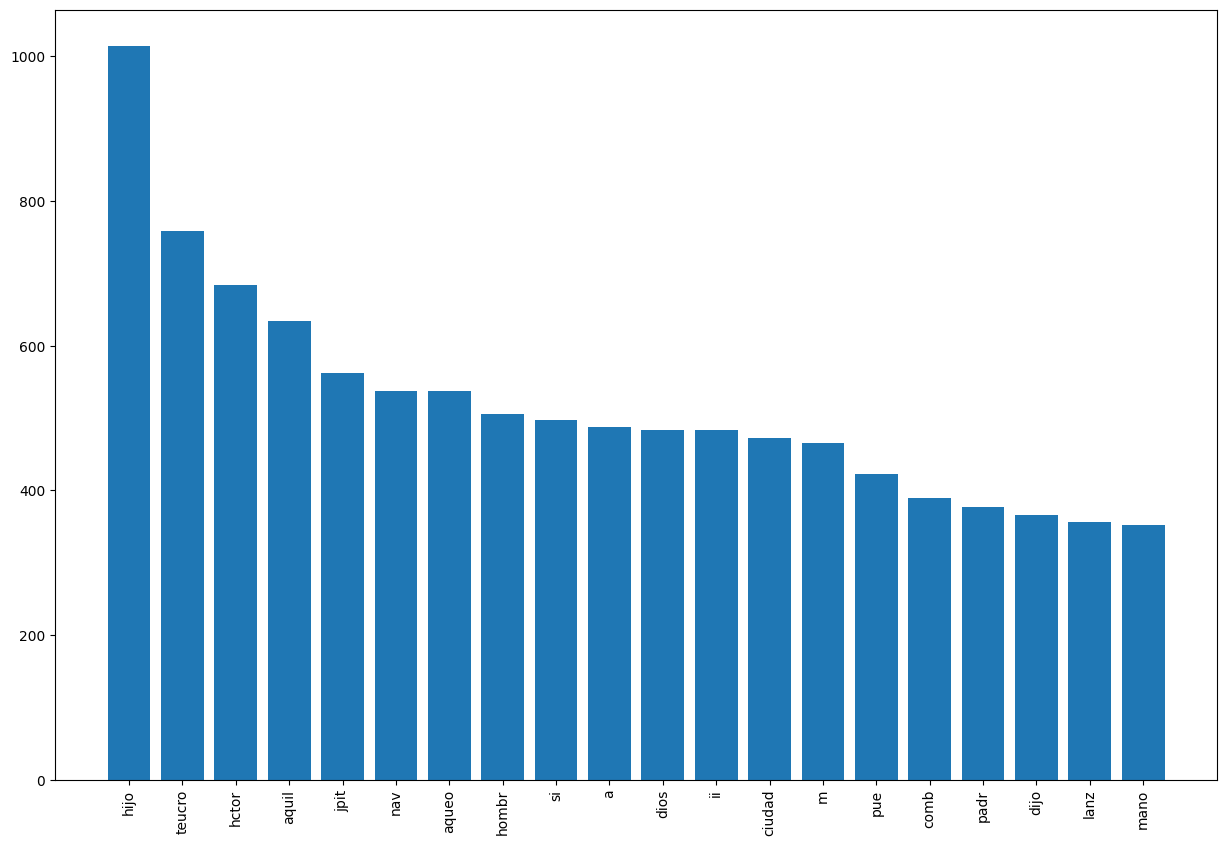

In [84]:
import matplotlib.pyplot as plt
x,y = zip(*top_words)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

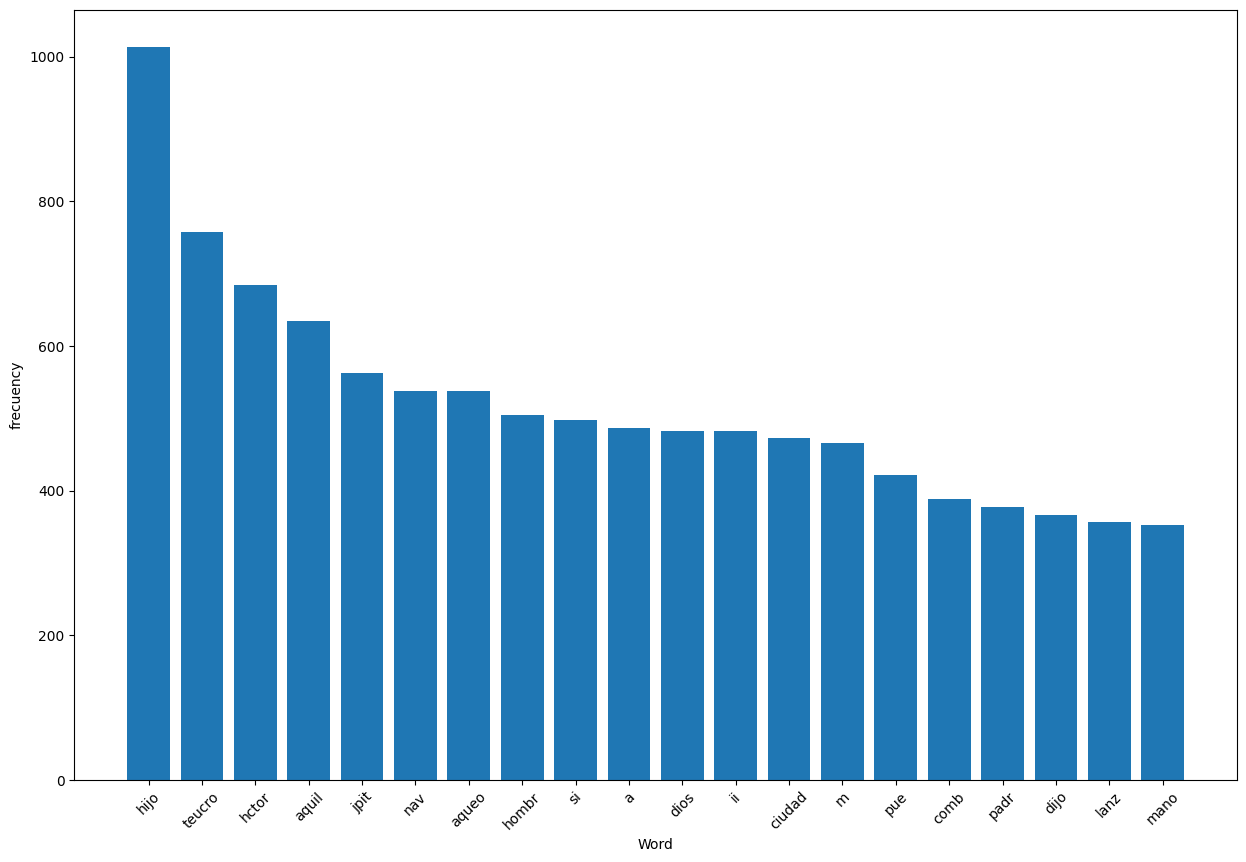

In [85]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_words)
plt.figure(figsize=(15,10))
plt.bar(df[0],df[1])
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("frecuency")
plt.show()